In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
train = pd.read_csv("titanic.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#finding missing data
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<AxesSubplot:>

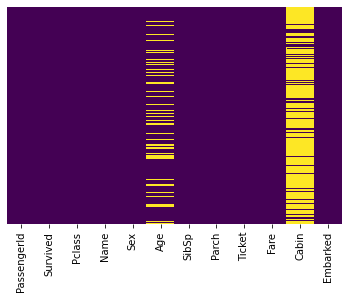

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

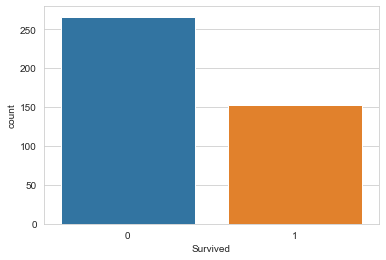

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

In [7]:
train['Age'].isnull().value_counts()

False    332
True      86
Name: Age, dtype: int64

In [8]:
train['Cabin'].isnull().value_counts()

True     327
False     91
Name: Cabin, dtype: int64

In [9]:
train['Fare'].isnull().value_counts()

False    418
Name: Fare, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

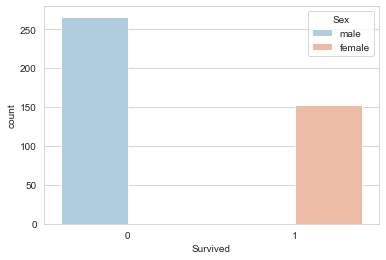

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

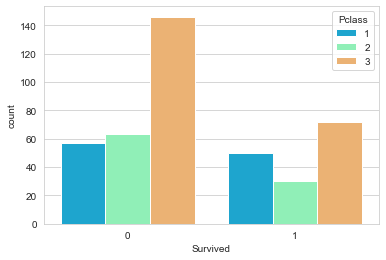

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

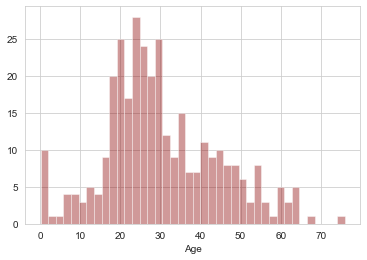

In [12]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

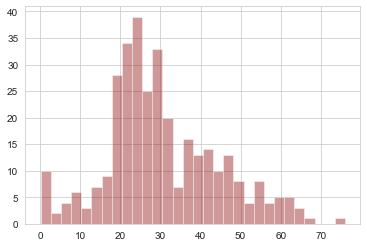

In [13]:
train['Age'].hist(bins=30,color='darkred',alpha=0.4)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

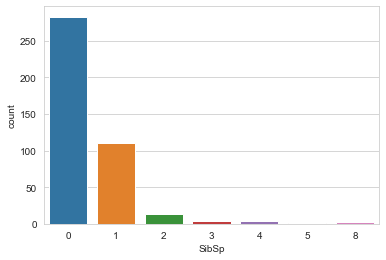

In [14]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

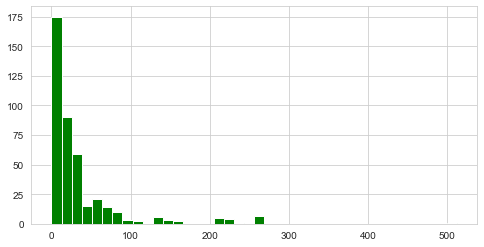

In [15]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [16]:
#Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

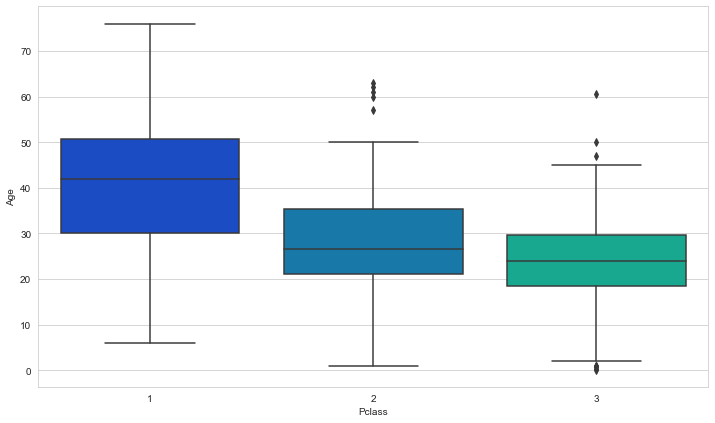

In [17]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [18]:
train['Fare'].mean()

35.62718803827748

In [19]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 27
        else:
            return 24
    else:
        return Age


In [20]:

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

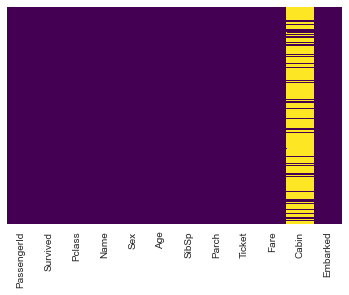

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
train['Age'].isnull().value_counts()

False    418
Name: Age, dtype: int64

In [23]:
train['Fare'].isnull().value_counts()

False    418
Name: Fare, dtype: int64

In [24]:
train.drop('Cabin',axis=1,inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


<AxesSubplot:>

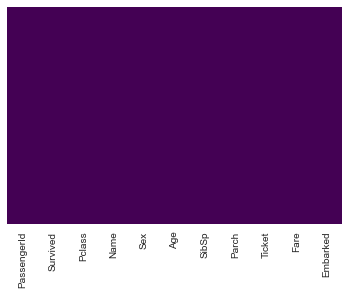

In [26]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [28]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


In [30]:
train = pd.concat([train,sex,embark],axis=1)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,1,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,1
2,894,0,2,62.0,0,0,9.6875,1,1,0
3,895,0,3,27.0,0,0,8.6625,1,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,1


In [32]:
#building a logistic regression model
#train test split

In [33]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [34]:
train['Survived'].head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

In [37]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
41,933,1,42.0,0,0,26.5500,1,0,1
24,916,1,48.0,1,3,262.3750,0,0,0
237,1129,3,20.0,0,0,7.2250,1,0,0
309,1201,3,45.0,1,0,14.1083,0,0,1
154,1046,3,13.0,4,2,31.3875,1,0,1
...,...,...,...,...,...,...,...,...,...
63,955,3,22.0,0,0,7.7250,0,1,0
326,1218,2,12.0,2,1,39.0000,0,0,1
337,1229,3,39.0,0,2,7.2292,1,0,0
11,903,1,46.0,0,0,26.0000,1,0,1


In [38]:
X_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
257,1149,3,28.0,0,0,8.0500,1,0,1
330,1222,2,48.0,0,2,36.7500,0,0,1
314,1206,1,55.0,0,0,135.6333,0,0,0
366,1258,3,24.0,1,0,14.4583,1,0,0
363,1255,3,27.0,0,0,8.6625,1,0,1
...,...,...,...,...,...,...,...,...,...
301,1193,2,27.0,0,0,15.0458,1,0,0
408,1300,3,24.0,0,0,7.7208,0,1,0
16,908,2,35.0,0,0,12.3500,1,1,0
31,923,2,24.0,2,0,31.5000,1,0,1


In [39]:
y_train

41     0
24     1
237    0
309    1
154    0
      ..
63     1
326    1
337    0
11     0
351    0
Name: Survived, Length: 292, dtype: int64

In [40]:
y_test

257    0
330    1
314    1
366    0
363    0
      ..
301    0
408    1
16     0
31     0
36     1
Name: Survived, Length: 126, dtype: int64

In [41]:
#training and predicting

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
predictions = logmodel.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
accuracy=confusion_matrix(y_test,predictions)

In [48]:
accuracy

array([[71,  0],
       [ 0, 55]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy = accuracy_score(y_test,predictions)
accuracy

1.0

In [52]:
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)